<a href="https://colab.research.google.com/github/arupm23/Heart_Stroke_Prediction/blob/main/Heart_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

In [ ]:
#Loading the dataset

df = pd.read_csv('/Heart-stroke-dataset.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
df.drop('id', axis=1, inplace = True)

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df['age'].astype(int)

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64

In [ ]:
df['hypertension'].astype(float)

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
5105    1.0
5106    0.0
5107    0.0
5108    0.0
5109    0.0
Name: hypertension, Length: 5110, dtype: float64

In [ ]:
#checking for null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#replacing the missing value with the most frequent value

df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)

In [ ]:
print(df['ever_married'].value_counts())

print(df['work_type'].value_counts())

print(df['Residence_type'].value_counts())

print(df['gender'].value_counts())

print(df['smoking_status'].value_counts())

Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [ ]:
#replacing the values in the column with the numerical values

"""residence type: Urban= 1, Rural = 0
    smoking_status: formerly smoked = 1, never smoked = 2, smokes = 3, Unknown = 0
    Ever_Maried : Yes = 1, No = 0
    Gender : Male = 1, Female = 0, Other = 2
    Work Type : Private = 0, Self-employed = 1, children = 2, Govt_job = 3, Never_worked = 4 """


df['ever_married'].replace({'Yes': 1, 'No': 0}, inplace=True)

df['gender'].replace({'Male':1, 'Female':0,'Other':2}, inplace=True)

df['Residence_type'].replace({'Urban':1, 'Rural':0}, inplace=True)

df['smoking_status'].replace({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}, inplace=True)

df['work_type'].replace({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4}, inplace=True)







<Axes: >

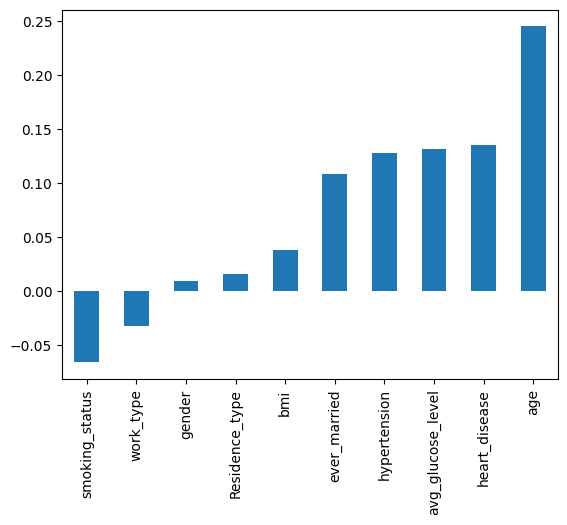

In [ ]:
#Explanatory Data Analysis

df.corr()['stroke'][:-1].sort_values().plot(kind='bar')

<Axes: >

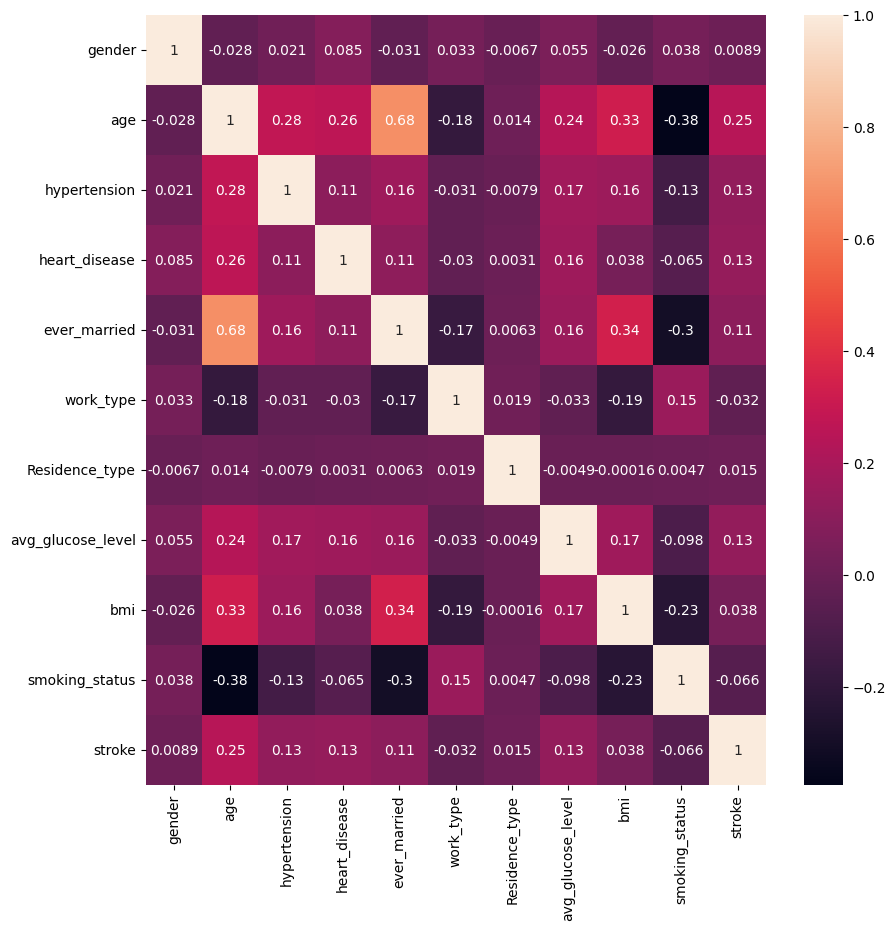

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
# replace age with number wrt to age group
# 0 = 0-12 , 1 = 13-19 , 2 = 20-30 , 3 = 31-60 , 4 = 61-100
df['age'] = pd.cut(x=df['age'], bins=[0, 12, 19, 30, 60, 100], labels=[0, 1, 2, 3,4])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,4,0,1,1,0,1,228.69,36.6,0,1
1,0,4,0,0,1,1,0,202.21,28.7,1,1
2,1,4,0,1,1,0,0,105.92,32.5,1,1
3,0,3,0,0,1,0,1,171.23,34.4,2,1
4,0,4,1,0,1,1,0,174.12,24.0,1,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: xlabel='gender', ylabel='count'>

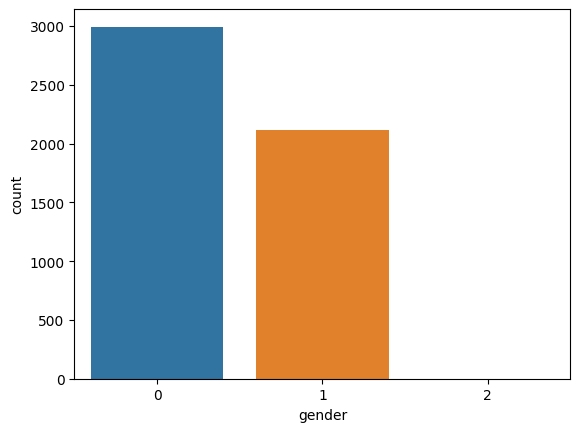

In [ ]:
#Visualizing the Data


sns.countplot(x = 'gender', data = df)


<Axes: xlabel='Residence_type', ylabel='count'>

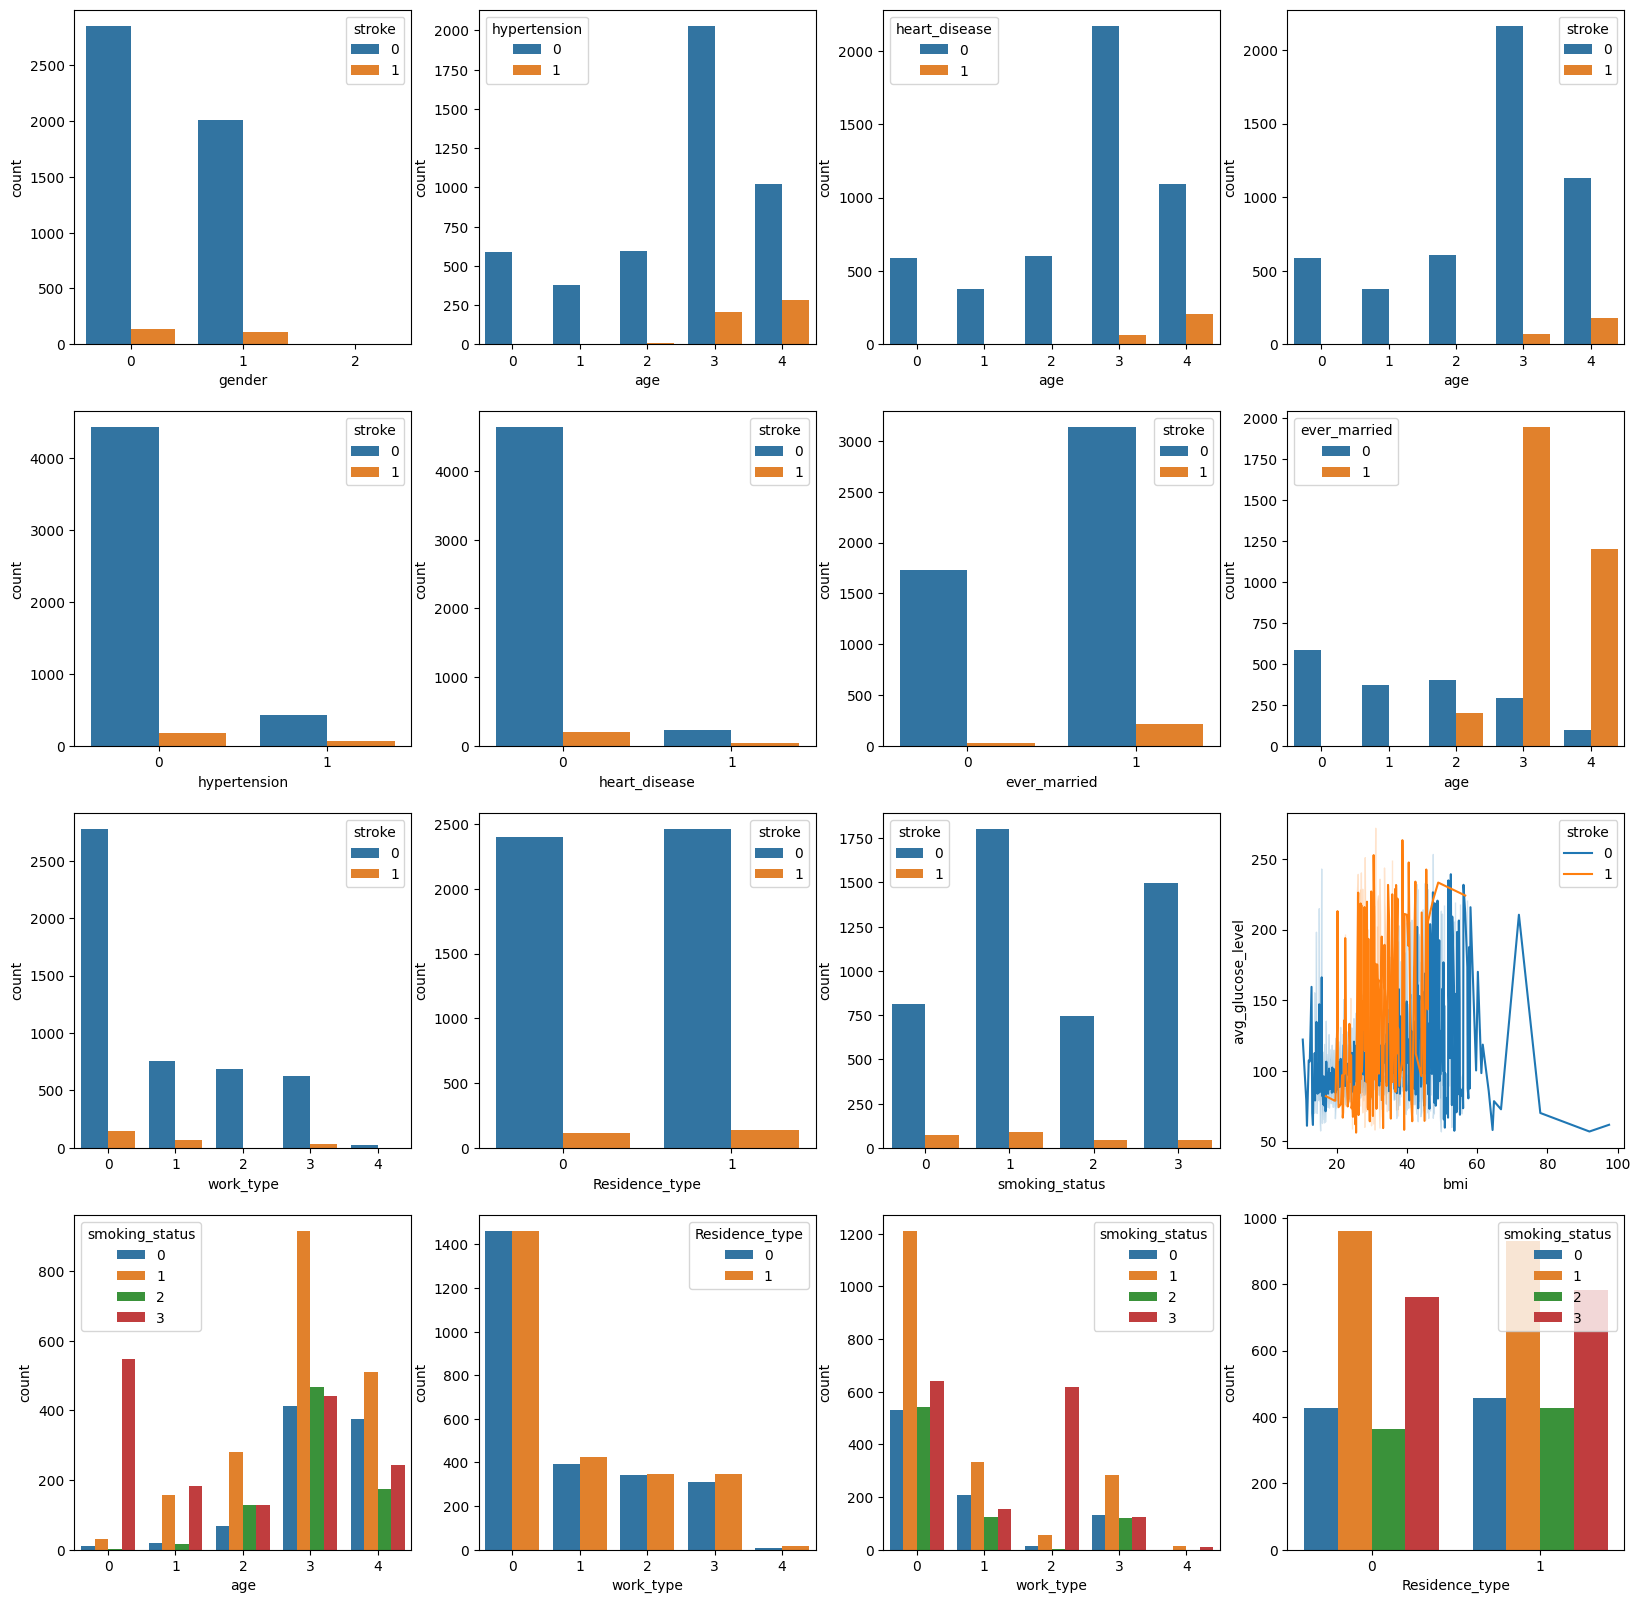

In [ ]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = df,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = df,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age', data = df,hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age', data = df,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = df,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = df,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = df,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age', data = df,hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = df,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'Residence_type', data = df,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = df,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = df,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age', data = df,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = df,hue = 'Residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = df,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'Residence_type', data = df,hue = 'smoking_status', ax=ax[3,3])

In [ ]:
#Model Test Train Split

x_train, x_test, y_train, y_test = train_test_split(df.drop('stroke', axis = 1), df['stroke'], test_size=0.2, random_state=42)

In [ ]:
#Model Training

lr = LogisticRegression()
lr

LogisticRegression()

In [ ]:
#training the model

lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9393346379647749

In [ ]:
#testing the Model
lr_pred = lr.predict(x_test)
accuracy_score(y_test, lr_pred)

0.9393346379647749

In [ ]:
#SUPPORT VECTOR MACHINE

from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [ ]:
#training the model

svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.9393346379647749

In [ ]:
#testing the model
svm_pred = svm.predict(x_test)
accuracy_score(y_test, svm_pred)

0.9393346379647749

In [ ]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [ ]:
#Training the model
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.9090019569471625

In [ ]:
#testing the model

dt_pred = dt.predict(x_test)
accuracy_score(y_test, dt_pred)

0.9090019569471625

In [ ]:
"""K - Nearest Neighbors (KNN) """

knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [ ]:
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9373776908023483

In [ ]:
knn_pred = knn.predict(x_test)
accuracy_score(y_test, knn_pred)

0.9373776908023483

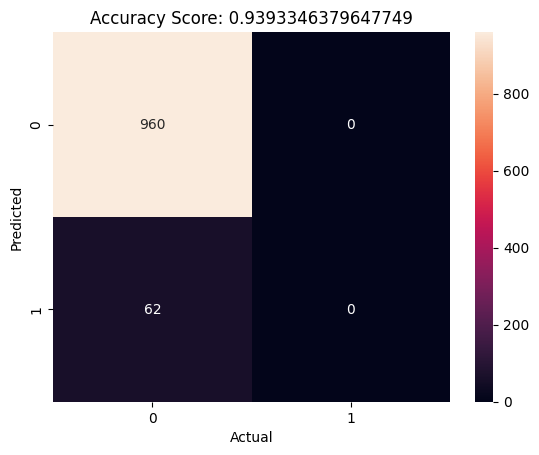

In [ ]:
#Model Evaluation

sns.heatmap(metrics.confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, lr_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [ ]:
print('Logistic Regression Model Accuracy Score:',accuracy_score(y_test, lr_pred))
print('Logistic Regression Model F1 score: ', metrics.f1_score(y_test, lr_pred))
print('Logistic Regression Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, lr_pred))
print('Logistic Regression Model Mean Squared Error: ',metrics.mean_squared_error(y_test, lr_pred))
print('Logistic Regression Model log loss: ',log_loss(y_test, lr_pred))

Logistic Regression Model Accuracy Score: 0.9393346379647749
Logistic Regression Model F1 score:  0.0
Logistic Regression Model Mean Absolute Error:  0.060665362035225046
Logistic Regression Model Mean Squared Error:  0.060665362035225046
Logistic Regression Model log loss:  2.1866012819229588


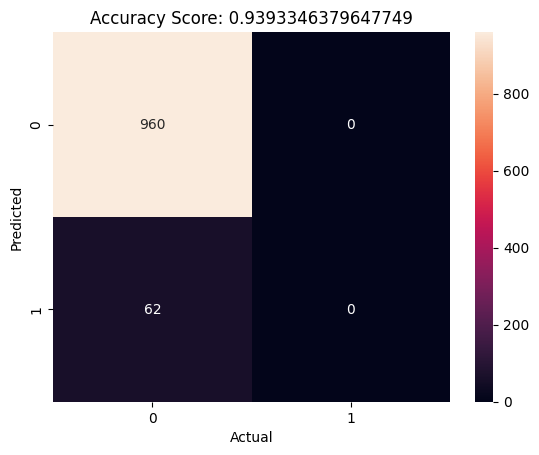

In [ ]:
# Support Vector Machine

sns.heatmap(metrics.confusion_matrix(y_test, svm_pred), annot = True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, svm_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [ ]:
print('Support Vector Machine Accuracy Score:',accuracy_score(y_test, svm_pred))
print('Support Vector Machine F1 score: ',metrics.f1_score(y_test, svm_pred))
print('Support Vector Machine Mean Absolute Error: ',metrics.mean_absolute_error(y_test, svm_pred))
print('Support Vector Machine Model Mean Squared Error: ',metrics.mean_squared_error(y_test, svm_pred))
print('Support Vector Machine Model log loss: ',log_loss(y_test, svm_pred))

Support Vector Machine Accuracy Score: 0.9393346379647749
Support Vector Machine F1 score:  0.0
Support Vector Machine Mean Absolute Error:  0.060665362035225046
Support Vector Machine Model Mean Squared Error:  0.060665362035225046
Support Vector Machine Model log loss:  2.1866012819229588


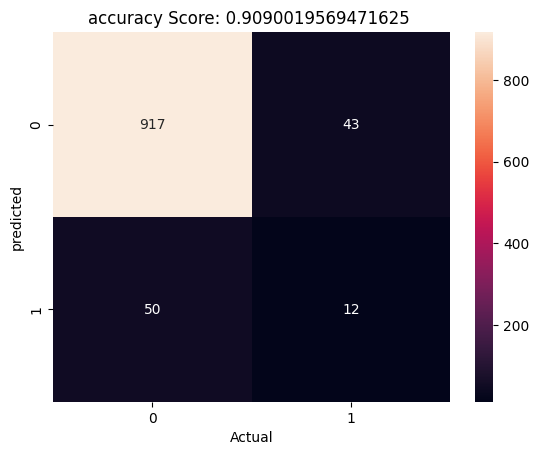

In [ ]:
# Decision Tree Classifier

sns.heatmap(metrics.confusion_matrix(y_test, dt_pred), annot=True, fmt='d')
plt.title('accuracy Score: {} '.format(accuracy_score(y_test, dt_pred)))
plt.ylabel('predicted')
plt.xlabel('Actual')
plt.show()

In [ ]:
print('Decision Tree Classifier Accuracy Score:',accuracy_score(y_test, dt_pred))
print('Decision Tree Classifier F1 score: ',metrics.f1_score(y_test, dt_pred))
print('Decision Tree Classifier Absolute Error: ',metrics.mean_absolute_error(y_test, dt_pred))
print('Decision Tree Classifier Mean Squared Error: ',metrics.mean_squared_error(y_test, dt_pred))
print('Decision Tree Classifier Model log loss: ',log_loss(y_test, dt_pred))

Decision Tree Classifier Accuracy Score: 0.9090019569471625
Decision Tree Classifier F1 score:  0.20512820512820512
Decision Tree Classifier Absolute Error:  0.09099804305283757
Decision Tree Classifier Mean Squared Error:  0.09099804305283757
Decision Tree Classifier Model log loss:  3.2799019228844375


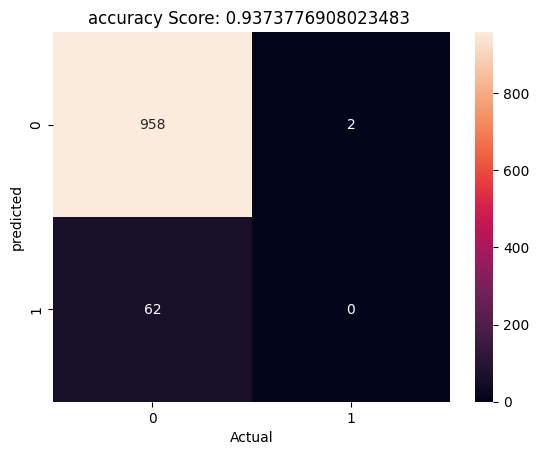

In [ ]:
#K_Nearest Neighbors (KNN)

sns.heatmap(metrics.confusion_matrix(y_test, knn_pred), annot=True, fmt='d')
plt.title('accuracy Score: {} '.format(accuracy_score(y_test, knn_pred)))
plt.ylabel('predicted')
plt.xlabel('Actual')
plt.show()

In [ ]:
print('KNN Accuracy Score:',accuracy_score(y_test, knn_pred))
print('KNN F1 score: ',metrics.f1_score(y_test, knn_pred))
print('KNN Absolute Error: ',metrics.mean_absolute_error(y_test, knn_pred))
print('KNN Mean Squared Error: ',metrics.mean_squared_error(y_test, knn_pred))
print('KNN Model log loss: ',log_loss(y_test, knn_pred))

KNN Accuracy Score: 0.9373776908023483
KNN F1 score:  0.0
KNN Absolute Error:  0.06262230919765166
KNN Mean Squared Error:  0.06262230919765166
KNN Model log loss:  2.2571368071462796


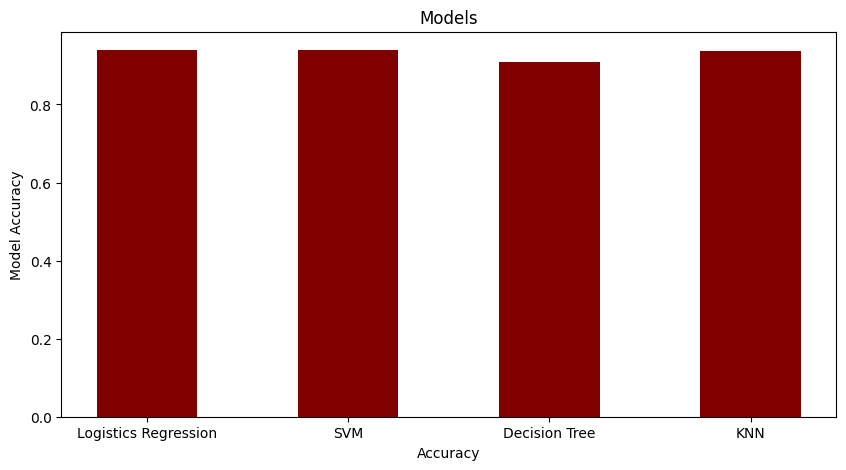

In [ ]:
# MOdel Comparison

models = ['Logistics Regression', 'SVM' , 'Decision Tree' , 'KNN' ]
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, svm_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, knn_pred)]
plt.figure(figsize=(10,5))
plt.bar(models, accuracy, color = "Maroon", width = 0.5)
plt.title('Models')
plt.xlabel('Accuracy')
plt.ylabel('Model Accuracy')
plt.show()